This notebook is a material used in a lecture taught by [Youngung Jeong](mailto:yjeong@changwon.ac.kr) at [Changwon National University](http://www.changwon.ac.kr) in the spring of 2017.

## Learning objectives
 1. A few more operations based on NumPy array
 2. Understand least-square method and learn how to conduct it using NumPy.
 3. Understand how to process signals from measurement systems to physical values (Understand "calibration")

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Devices used to measure 'displacement' and 'force' recieves electrical signal from 'extensometer' and 'load-cell'

**displacement과 힘을 측정하는데 쓰이는 장비(도구)는 익스텐소미터와 로드셀이라 불린다.**

## How to read a datasheet?

In [29]:
data=np.loadtxt('RD4/Voltage.txt',skiprows=20)
print data.shape

(19987, 4)


The variable data is an array with 2 'axes'. This can be understand as a collection of coordinates spread in 2-dimension space. You have, in total, (19987x4) points. It was shown that this array has a shape of (19987,4). You can 'swap' this shape to (4x19987) through an operation called 'transpose'. 

In [3]:
data=data.T ## data.T create the transposed array of data and returns.
print data.shape

(4, 19987)


If you want to read the data pertaining to first column and third row: data[0,2]

In [4]:
data[0,2] # pointing the element located in the first column and the third row 

-0.8122625

If you want to read all the elements pertaining to the first column

In [5]:
print data[0,:]

[-0.8119438 -0.8113064 -0.8122625 ...,  2.000035   1.999078   2.000991 ]


In [6]:
print data[0,:].shape

(19987,)


The above can be 'shortened' to

In [7]:
print data[0]

[-0.8119438 -0.8113064 -0.8122625 ...,  2.000035   1.999078   2.000991 ]


There are more 'similar' features in [NumPy](http://www.numpy.org) array. Find more about them [here](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

# Plot first column against the second column

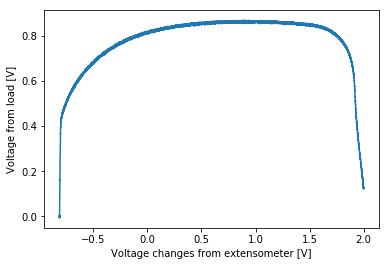

In [8]:
plot(data[0],data[1],'-')
# The first column is actually 
xlabel('Voltage changes from extensometer [V]')
ylabel('Voltage from load [V]')

- Q. Why the force drop towards the end of the curve?

## You'll be given a file named 'axial_ext.txt' for your own exercise

The **calib/axial_ext.txt** file is a datasheet that contains the lengths of gauge blocks vs. their corresponding voltage signals obtained by the extensometer subject to calibration.
Look at the below figure (from [wikipedia.org](http://www.wikipedia.org)), which shows a number of gauge blocks that are precisely manufactured with great care.
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/GaugeBlockMetricSet.jpg">


Image of an 'extensometer' attached to a rod-shaped tensile specimen. This extensometer is a commercial product produced by [Epsilon Tech Corp](http://www.epsilontech.com).
<img src="http://www.epsilontech.com/wp-content/uploads/2016/04/tensile-testing-extensometer-Model-3542-creative-8.jpg">

In [9]:
# I have saved the file under a folder named 'calib'
# Warning: the command 'ls' is usually available on Unix/Linux systems. On windows, use 'dir'
!ls calib/

axial_ext.txt calib.txt     wid_ext.txt


In [10]:
## Warning: the command head is usually available at any Unix/Linux systems. 
## Not sure about Windows.
!head calib/axial_ext.txt 

Pcal    Pext
0       -3.1756
0.025   -2.918
0.05    -2.662
0.075   -2.405
0.100   -2.149
0.125   -1.892
0.150   -1.635
0.175   -1.378
0.200   -1.122


In [11]:
dat_axial_calib=np.loadtxt('calib/axial_ext.txt',skiprows=1)

In [12]:
print dat_axial_calib.shape

(15, 2)


- Transpose

In [13]:
dat_axial_calib = dat_axial_calib.T
print dat_axial_calib.shape

(2, 15)


- Extensometer reads displacement in terms of 'voltage' change. We want to convert the voltage signals to displacement values in the unit of milimeter.

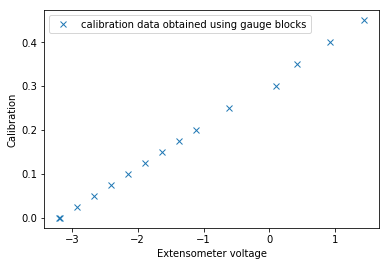

In [14]:
plot(dat_axial_calib[1],dat_axial_calib[0],'x',
     label='calibration data obtained using gauge blocks')

ylabel('Calibration')
xlabel('Extensometer voltage')
legend()

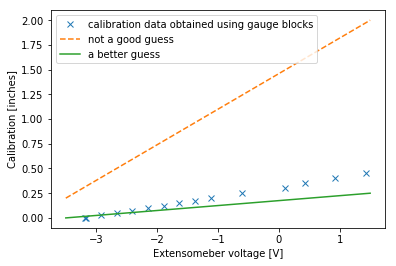

In [15]:
plot(dat_axial_calib[1],dat_axial_calib[0],'x',
     label='calibration data obtained using gauge blocks')

## manually determine the slope? (practice)
plot([-3.5,1.5],[0.2,2],'--',label='not a good guess')
plot([-3.5,1.5],[0,0.25],'-',label='a better guess')

ylabel('Calibration [inches]')
xlabel('Extensomeber voltage [V]')
legend()

## Is there a way to get this done using computer?
- The [least square method](https://en.wikipedia.org/wiki/Least_squares) (최소자승법) is a very "classical" and still very popular way to determine a 'straight'-line that goes through a set of 'scattered' data

Remeber that a straight line can be expressed as:
y = *a* x + *b*, where *a* and *b* are two unknown coefficients (i.e., slope of the line (기울기) and the intercept with y-axis (y 절편), respectively).

Basically, the least-square method is a way to determine the coefficients of the 'correct' line equation that exhibits a linear trend expected in a set of scattered points.

## How would you obtain the coefficients?

- We are re-writing the line equation as "y=Ap" where A becomes [[x 1]] p = [[m c]]. For more details of np.linalg.lstsq function, click on this [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq). 

In [16]:
x=dat_axial_calib[1]
y=dat_axial_calib[0]

A = np.vstack([x, np.ones(len(x))]).T  ## stacking x array and an array consisting only with 1 (i.e., [[x 1]])
m, c = np.linalg.lstsq(A, y)[0]

print 'm:',m
print 'c:',c

m: 0.0966208926192
c: 0.307176757647


- You see, np.vstack and np.linslg.lstsq were used in the above. Find more about them using **help** feature

In [17]:
help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg.linalg:

lstsq(a, b, rcond=-1)
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
        Singular values

In [18]:
help(np.vstack)

Help on function vstack in module numpy.core.shape_base:

vstack(tup)
    Stack arrays in sequence vertically (row wise).
    
    Take a sequence of arrays and stack them vertically to make a single
    array. Rebuild arrays divided by `vsplit`.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        Tuple containing arrays to be stacked. The arrays must have the same
        shape along all but the first axis.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    stack : Join a sequence of arrays along a new axis.
    hstack : Stack arrays in sequence horizontally (column wise).
    dstack : Stack arrays in sequence depth wise (along third dimension).
    concatenate : Join a sequence of arrays along an existing axis.
    vsplit : Split array into a list of multiple sub-arrays vertically.
    
    Notes
    -----
    Equivalent to ``np.concatenate(tup, axis=0)`` if `tup` contains 

- Sanity check

m: 0.0966208926192
c: 0.307176757647


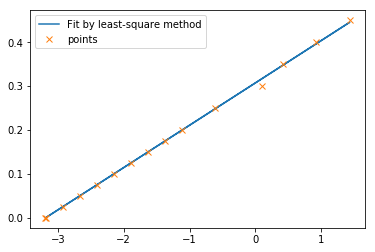

In [19]:
y_fit=x*m+c
plot(x,y_fit,label='Fit by least-square method')
plot(dat_axial_calib[1],dat_axial_calib[0],'x',label='points')
legend()

print 'm:',m
print 'c:',c

- We can now construct a function that can convert a 'voltage' signals to 'extension'

In [20]:
def convert_volt_to_axial_extension(voltage):
    """
    Function that converts 'voltage' to extension
    
    Argument
    --------
    voltage: value of voltage obtained from your axial extensometer
    
    Return
    ------
    voltage * m + c, 
        where m and c are coefficients of a straight-line that describes
        the linear relationship between the voltage signal and 'acutal' extension.   
    """
    return voltage * m + c

In [21]:
convert_volt_to_axial_extension(1.)

0.40379765026601089

- The 'string' block right starting in the following line of the function can be used as 'documentation' saved as an attribute '__doc__'. You can put instructions and read it later. See below cell:

In [22]:
print convert_volt_to_axial_extension.__doc__


    Function that converts 'voltage' to extension
    
    Argument
    --------
    voltage: value of voltage obtained from your axial extensometer
    
    Return
    ------
    voltage * m + c, 
        where m and c are coefficients of a straight-line that describes
        the linear relationship between the voltage signal and 'acutal' extension.   
    


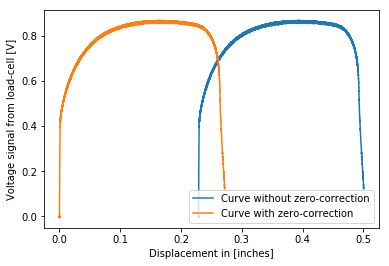

In [23]:
plot(data[0,:]*m+c,data[1,:],'-',label="Curve without zero-correction")
x_shifted=data[0,:]*m+c -(data[0,0]*m+c)
plot(x_shifted,data[1,:],'-',label="Curve with zero-correction")
legend()

xlabel('Displacement in [inches]')
ylabel('Voltage signal from load-cell [V]')

Remember the definition of 'engineering' strain

$\epsilon=\frac{l_1-l_0}{l_0}$
Let's convert the 'displacement' to 'length'
$l_1=l_0+d$

Therefore,
$\epsilon=\frac{d}{l_0}$. 

Usually, when conducting uniaxial tension test, we know the initial distance between the two arms of extensometer. Let's assume it is 20 [mm].

Also, you can find the converting factor between unit inch and unit milimeter system, i.e.,  **in = mm * 0.039370**.

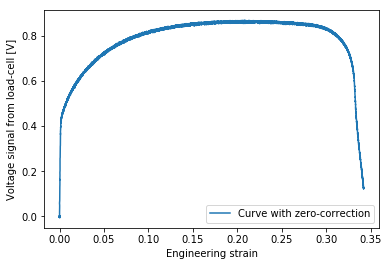

In [28]:
engi_strain=x_shifted/(20*0.03970)

plot(engi_strain,data[1,:],'-',label="Curve with zero-correction")
legend()
xlabel('Engineering strain')
ylabel('Voltage signal from load-cell [V]')

There is another extensometer that measures the displacement transverse to the longtidinal direction.

In [24]:
a=np.array([[0.4 ,   -3.03],
[0.45  ,  -1.571],
[0.5    , -0.101],
[0.55  , 1.330],
[0.6   , 2.806],
[0.405 , -2.928],
[0.42  , -2.498],
[0.47  , -1.055],
[0.57  , 1.946]
])
a=a.T

0.0340472173572 0.504297206193


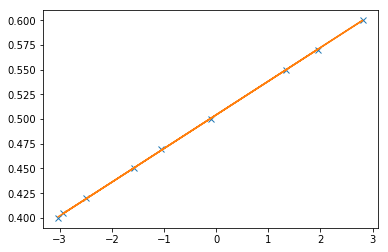

In [25]:
plot(a[1],a[0],'x')

A = np.vstack([a[1], np.ones(len(a[1]))]).T  ## stacking x array and an array consisting only with 1 (i.e., [[x 1]])
m, c = np.linalg.lstsq(A, a[0])[0]

y=m*a[1]+c
plot(a[1],y)
print m, c